# Deep Learning in Waste Management

![alt text](https://raw.githubusercontent.com/krithikaceg/waste_management/master/Waste-Management-1.png)

Waste Management is a huge problem in any country, especially where the population is growing. One of the major problems is the huge amount of waste that goes to landfills. According to CNBC, San Francisco has diverted 80% of its waste from going to landfills with an aim to achieve zero waste. The city has done this with the help of its waste management company, Recology. With the help of the blue bins, it collects the recyclable waste from all around the city.

Even though most of the time people throw the waste in the appropriate waste bin, sometimes people tend to throw it in incorrect bin which makes the waste segregation difficult. This Project is aimed towards helping the recycling centers in separating non-recyclable materials using Machine Learning techniques.


**Importing library**

In [15]:
import numpy as np # MATRIX OPERATIONS
import pandas as pd # EFFICIENT DATA STRUCTURES
import matplotlib.pyplot as plt # GRAPHING AND VISUALIZATIONS
import math # MATHEMATICAL OPERATIONS
import cv2 # IMAGE PROCESSING - OPENCV
from glob import glob # FILE OPERATIONS
import itertools
#ali
import joblib

# KERAS AND SKLEARN MODULES
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import BatchNormalization
from keras.callbacks import ModelCheckpoint,ReduceLROnPlateau,CSVLogger

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


# GLOBAL VARIABLES
scale = 160 #70
seed = 90

## Data Ingestion

All the waste material images are collected and organized under their respective folders. For example, cardboard images are organized under cardboard folder inside dataset-resized. This is how each images is being labelled.

In [16]:
#!wget https://raw.githubusercontent.com/krithikaceg/waste_management/master/dataset-resized_new.zip
zip_images = 'dataset-resized_new.zip'
import zipfile
zip_ref = zipfile.ZipFile(zip_images, 'r')
zip_ref.extractall("wm-dataset")
zip_ref.close()


## EDA

In [17]:

path_to_images = 'wm-dataset/dataset-resized_new/*/*.jpg'
images = glob(path_to_images)
trainingset = []
traininglabels = []
num = len(images)
count = 1
#READING IMAGES AND RESIZING THEM
for i in images:
    print(str(count)+'/'+str(num),end='\r')
    trainingset.append(cv2.resize(cv2.imread(i),(scale,scale)))
    traininglabels.append(i.split('\\')[-2])
    count=count+1
trainingset = np.asarray(trainingset)
# Save the label encoder to a file

traininglabels = pd.DataFrame(traininglabels)

### Classifications

Classes['cardboard' 'glass' 'metal' 'paper' 'plastic']
5
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 156, 156, 64)      4864      
                                                                 
 batch_normalization (BatchN  (None, 156, 156, 64)     256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 152, 152, 64)      102464    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 76, 76, 64)       0         
 )                                                               
                                                                 
 batch_normalization_1 (Batc  (None, 76, 76, 64)       256       
 hNormalization)                                                 

ResourceExhaustedError: Graph execution error:

MemoryError: Unable to allocate 9.38 MiB for an array with shape (32, 160, 160, 3) and data type float32
Traceback (most recent call last):

  File "C:\Users\EgyptSat\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\ops\script_ops.py", line 271, in __call__
    ret = func(*args)

  File "C:\Users\EgyptSat\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\autograph\impl\api.py", line 642, in wrapper
    return func(*args, **kwargs)

  File "C:\Users\EgyptSat\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\data\ops\dataset_ops.py", line 1039, in generator_py_func
    values = next(generator_state.get_iterator(iterator_id))

  File "C:\Users\EgyptSat\AppData\Roaming\Python\Python37\site-packages\keras\engine\data_adapter.py", line 902, in wrapped_generator
    yield self._standardize_batch(data)

  File "C:\Users\EgyptSat\AppData\Roaming\Python\Python37\site-packages\keras\engine\data_adapter.py", line 928, in _standardize_batch
    data = tf.nest.map_structure(_convert_dtype, data)

  File "C:\Users\EgyptSat\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\util\nest.py", line 917, in map_structure
    structure[0], [func(*x) for x in entries],

  File "C:\Users\EgyptSat\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\util\nest.py", line 917, in <listcomp>
    structure[0], [func(*x) for x in entries],

  File "C:\Users\EgyptSat\AppData\Roaming\Python\Python37\site-packages\keras\engine\data_adapter.py", line 925, in _convert_dtype
    return np.array(t, dtype=backend.floatx())

numpy.core._exceptions._ArrayMemoryError: Unable to allocate 9.38 MiB for an array with shape (32, 160, 160, 3) and data type float32


	 [[{{node PyFunc}}]]
	 [[IteratorGetNext]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_train_function_4913]

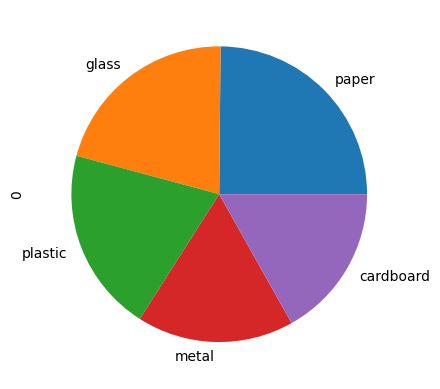

In [18]:
# Encode labels
labels = preprocessing.LabelEncoder()
labels.fit(traininglabels[0])
print('Classes' + str(labels.classes_))
encodedlabels = labels.transform(traininglabels[0])
clearalllabels = np_utils.to_categorical(encodedlabels)
classes = clearalllabels.shape[1]
print(str(classes))

# Save the label encoder
joblib.dump(labels, 'Ali_2.pkl')

# Display class distribution
traininglabels[0].value_counts().plot(kind='pie')

# Normalize the data
new_train = trainingset / 255.0
x_train, x_test, y_train, y_test = train_test_split(new_train, clearalllabels, test_size=0.1, random_state=seed, stratify=clearalllabels)

# Data augmentation
generator = ImageDataGenerator(rotation_range=180, zoom_range=0.1, width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True, vertical_flip=True)
generator.fit(x_train)

# Model definition
model = Sequential()

model.add(Conv2D(filters=64, kernel_size=(5, 5), input_shape=(scale, scale, 3), activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization(axis=3))
model.add(Dropout(0.1))

model.add(Conv2D(filters=128, kernel_size=(5, 5), activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(filters=128, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization(axis=3))
model.add(Dropout(0.1))

model.add(Conv2D(filters=256, kernel_size=(5, 5), activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(filters=256, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization(axis=3))
model.add(Dropout(0.1))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

# Training the model
model.fit(generator.flow(x_train, y_train, batch_size=32), validation_data=(x_test, y_test), epochs=50, verbose=1)

# Evaluate the model
print(model.evaluate(x_train, y_train))  # Evaluate on train set
print(model.evaluate(x_test, y_test))  # Evaluate on test set

# Confusion matrix
y_pred = model.predict(x_test)
y_class = np.argmax(y_pred, axis=1)
y_check = np.argmax(y_test, axis=1)
cmatrix = confusion_matrix(y_check, y_class)
print(cmatrix)

# Display test images with predictions
for i in range(8):
    plt.subplot(2, 4, i + 1)
    plt.imshow(x_test[i])
    print("Predicted: " + labels.classes_[y_class[i]])
    print("Actual class: " + labels.classes_[y_check[i]])

# Save the model
model.save('Ali_2.h5')

Classes: ['cardboard' 'glass' 'metal' 'paper' 'plastic']
Epoch 1/50
68/68 [==============================] - 186s 3s/step - loss: 2.1938 - accuracy: 0.3347 - val_loss: 67.5641 - val_accuracy: 0.1715
Epoch 2/50
68/68 [==============================] - 187s 3s/step - loss: 1.8206 - accuracy: 0.4068 - val_loss: 7.3791 - val_accuracy: 0.2301
Epoch 3/50
68/68 [==============================] - 178s 3s/step - loss: 1.6202 - accuracy: 0.4389 - val_loss: 3.6921 - val_accuracy: 0.3347
Epoch 4/50
68/68 [==============================] - 218s 3s/step - loss: 1.5265 - accuracy: 0.4510 - val_loss: 2.5202 - val_accuracy: 0.2636
Epoch 5/50
68/68 [==============================] - 255s 4s/step - loss: 1.4358 - accuracy: 0.4654 - val_loss: 1.9103 - val_accuracy: 0.3682
Epoch 6/50
68/68 [==============================] - 277s 4s/step - loss: 1.3754 - accuracy: 0.4872 - val_loss: 2.1628 - val_accuracy: 0.2887
Epoch 7/50
68/68 [==============================] - 300s 4s/step - loss: 1.2811 - accuracy: 0.50

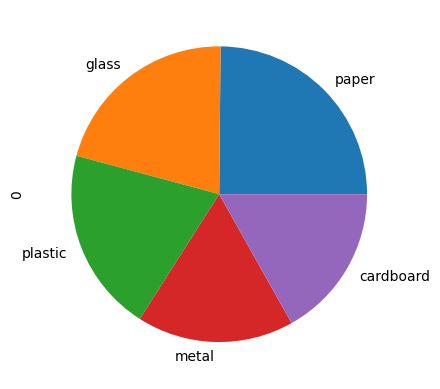

In [4]:
labels = preprocessing.LabelEncoder()
labels.fit(traininglabels[0])
print('Classes: ' + str(labels.classes_))

encodedlabels = labels.transform(traininglabels[0])
clearalllabels = np_utils.to_categorical(encodedlabels)

#ali
# Save the label encoder
joblib.dump(labels, 'Ali_1.pkl')

# Split the dataset
x_train, x_test, y_train, y_test = train_test_split(trainingset, clearalllabels, test_size=0.1, random_state=seed, stratify=clearalllabels)
# Data augmentation
generator = ImageDataGenerator(rotation_range=180, zoom_range=0.1, width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True, vertical_flip=True)
generator.fit(x_train)


# List of desired classes
desired_classes = ['cardboard', 'glass', 'metal', 'paper', 'plastic']

# Build the model
model = Sequential([
    Conv2D(64, (5, 5), activation='relu', input_shape=(scale, scale, 3)),
    BatchNormalization(),
    Conv2D(64, (5, 5), activation='relu'),
    MaxPooling2D((2, 2)),
    BatchNormalization(),
    Dropout(0.1),
    Conv2D(128, (5, 5), activation='relu'),
    BatchNormalization(),
    Conv2D(128, (5, 5), activation='relu'),
    MaxPooling2D((2, 2)),
    BatchNormalization(),
    Dropout(0.1),
    Conv2D(256, (5, 5), activation='relu'),
    BatchNormalization(),
    Conv2D(256, (5, 5), activation='relu'),
    MaxPooling2D((2, 2)),
    BatchNormalization(),
    Dropout(0.1),
    Flatten(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(len(desired_classes), activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(generator.flow(x_train, y_train, batch_size=32), validation_data=(x_test, y_test), epochs=50)

# Save the model
model.save('Ali_1.h5')



# Use shape[1] to get the number of classes
classes = clearalllabels.shape[1]
print('Number of classes: ' + str(classes))
print(str(classes))
# Plot the class distribution
traininglabels[0].value_counts().plot(kind='pie')
plt.show()

### Sample Images from training set

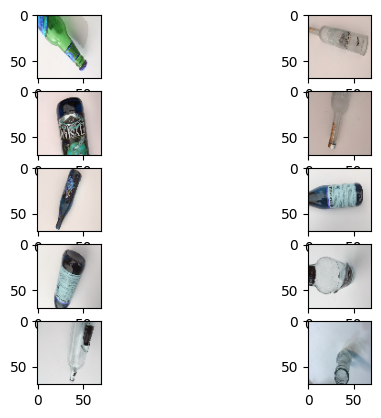

In [56]:
for i in range(10):
    plt.subplot(5, 2, i+1)
    plt.imshow(trainingset[i+590])

### Masking images (for the machine to recognise and learn)

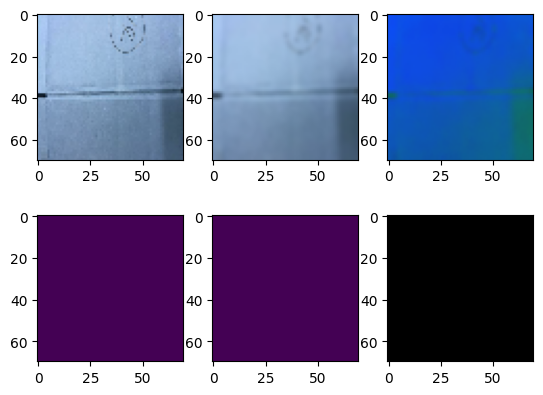

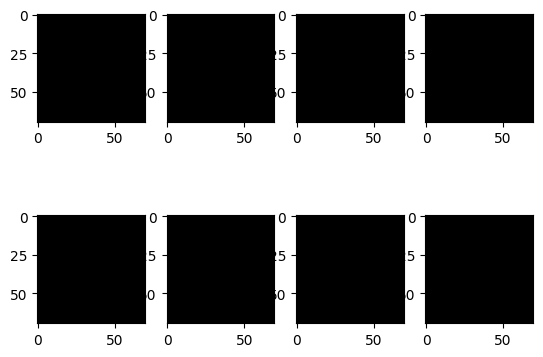

In [72]:
new_train = []
sets = []; getEx = True
for i in trainingset:
    blurr = cv2.GaussianBlur(i,(5,5),0)
    hsv = cv2.cvtColor(blurr,cv2.COLOR_BGR2HSV)
    #GREEN PARAMETERS
    lower = (25,40,50)
    upper = (75,255,255)
    mask = cv2.inRange(hsv,lower,upper)
    struc = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(11,11))
    mask = cv2.morphologyEx(mask,cv2.MORPH_CLOSE,struc)
    boolean = mask>0
    new = np.zeros_like(i,np.uint8)
    new[boolean] = i[boolean]
    new_train.append(new)
    
    if getEx:
        plt.subplot(2,3,1);plt.imshow(i) # ORIGINAL
        plt.subplot(2,3,2);plt.imshow(blurr) # BLURRED
        plt.subplot(2,3,3);plt.imshow(hsv) # HSV CONVERTED
        plt.subplot(2,3,4);plt.imshow(mask) # MASKED
        plt.subplot(2,3,5);plt.imshow(boolean) # BOOLEAN MASKED
        plt.subplot(2,3,6);plt.imshow(new) # NEW PROCESSED IMAGE
        plt.show()
        getEx = False
    
new_train = np.asarray(new_train)

# CLEANED IMAGES
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.imshow(new_train[i])

## Model

In [73]:
new_train = new_train/255
x_train,x_test,y_train,y_test = train_test_split(new_train,clearalllabels,test_size=0.1,random_state=seed,stratify=clearalllabels)

In [74]:
generator = ImageDataGenerator(rotation_range = 180,zoom_range = 0.1,width_shift_range = 0.1,height_shift_range = 0.1,horizontal_flip = True,vertical_flip = True)
generator.fit(x_train)

### Convolutional Neural Network for Image predictions

In [75]:
np.random.seed(seed)

model = Sequential()

model.add(Conv2D(filters=64, kernel_size=(5, 5), input_shape=(scale, scale, 3), activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization(axis=3))
model.add(Dropout(0.1))

model.add(Conv2D(filters=128, kernel_size=(5, 5), activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(filters=128, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization(axis=3))
model.add(Dropout(0.1))

model.add(Conv2D(filters=256, kernel_size=(5, 5), activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(filters=256, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization(axis=3))
model.add(Dropout(0.1))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 66, 66, 64)        4864      
                                                                 
 batch_normalization_8 (Batc  (None, 66, 66, 64)       256       
 hNormalization)                                                 
                                                                 
 conv2d_7 (Conv2D)           (None, 62, 62, 64)        102464    
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 31, 31, 64)       0         
 2D)                                                             
                                                                 
 batch_normalization_9 (Batc  (None, 31, 31, 64)       256       
 hNormalization)                                                 
                                                      

In [26]:
print(model.evaluate(x_train, y_train))  # Evaluate on train set
print(model.evaluate(x_test, y_test))  # Evaluate on test set

68/68 [==============================] - 43s 628ms/step - loss: 1.6091 - accuracy: 0.2278
[1.6091384887695312, 0.22780102491378784]
8/8 [==============================] - 5s 602ms/step - loss: 1.6090 - accuracy: 0.2469
[1.6089985370635986, 0.24686191976070404]


### Prediction

In [76]:
y_pred = model.predict(x_test)
y_class = np.argmax(y_pred, axis = 1) 
y_check = np.argmax(y_test, axis = 1) 

cmatrix = confusion_matrix(y_check, y_class)
print(cmatrix)

8/8 [==============================] - 5s 561ms/step
[[34  0  0  0  6]
 [18  4  0  2 26]
 [20  5  0  0 16]
 [34  9  0  2 15]
 [27  3  0  0 18]]


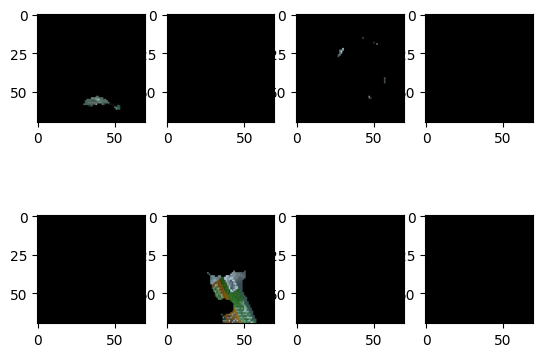

In [77]:
for i in range(8):
  plt.subplot(2,4,i+1)
  plt.imshow(x_test[i])
  
  

In [79]:
for i in range(8):
  print("Predicted: " + labels.classes_[y_class[i]])
  print("Actual class: "+labels.classes_[y_check[i]])

Predicted: plastic
Actual class: plastic
Predicted: cardboard
Actual class: cardboard
Predicted: glass
Actual class: metal
Predicted: cardboard
Actual class: glass
Predicted: cardboard
Actual class: cardboard
Predicted: plastic
Actual class: plastic
Predicted: cardboard
Actual class: plastic
Predicted: cardboard
Actual class: glass


## Keras pre-trained VGG 16 model

In [2]:
from keras_preprocessing.image import load_img
from keras_preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16
# load the model
model = VGG16()


In [3]:
#!wget https://raw.githubusercontent.com/krithikaceg/waste_management/master/plastic_bottle_trash.jpg
# load an image from file
image = load_img('plastic_bottle_trash.jpg', target_size=(224, 224))
# convert the image pixels to a numpy array
image = img_to_array(image)
# reshape data for the model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
# prepare the image for the VGG model
image = preprocess_input(image)
# predict the probability across all output classes
yhat = model.predict(image)
# convert the probabilities to class labels
label = decode_predictions(yhat)
# retrieve the most likely result, e.g. highest probability
label = label[0][0]
# print the classification
print('%s (%.2f%%)' % (label[1], label[2]*100))
model.summary()

1/1 [==============================] - 1s 1s/step
pop_bottle (18.17%)
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                         

## Prediction using Google AutoML Vision

In [14]:
from keras.models import load_model
from keras_preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
import numpy as np
import cv2
import joblib

# Load your trained model (update the model path accordingly)
model = VGG16()

#model.save('path_to_your_trained_model.h5')
#joblib.dump(labels, 'label_encoder.pkl')

# Load the label encoder
labels = joblib.load('label_encoder.pkl')
class_names = labels.classes_

# Function to preprocess the image
def preprocess_image(image):
    image = cv2.resize(image, (224, 224))  # Resize to model input size
    image = img_to_array(image)  # Convert to array
    image = np.expand_dims(image, axis=0)  # Expand dimensions to match model input
    image = preprocess_input(image)  # Preprocess using VGG16 specific preprocessing
    return image

# Function to predict and annotate the image
def predict_and_annotate(image):
    preprocessed_image = preprocess_image(image)
    yhat = model.predict(preprocessed_image)
    predicted_class_index = np.argmax(yhat, axis=1)
    label_text = f'{class_names[predicted_class_index][0]} ({np.max(yhat)*100:.2f}%)'
    annotated_image = image.copy()
    cv2.putText(annotated_image, label_text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    return annotated_image

# Initialize the video capture
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Error: Could not open video.")
    exit()

cv2.namedWindow('USB Camera')

# Variable to store the frame when clicked
captured_frame = None

# Mouse callback function to capture frame on click
def capture_frame(event, x, y, flags, param):
    global captured_frame
    if event == cv2.EVENT_LBUTTONDOWN:
        captured_frame = param.copy()

cv2.setMouseCallback('USB Camera', capture_frame)

while True:
    ret, frame = cap.read()
    if not ret:
        print("Failed to grab frame")
        break

    cv2.imshow('USB Camera', frame)

    if captured_frame is not None:
        result_frame = predict_and_annotate(captured_frame)
        cv2.imshow('Detection Result', result_frame)
        captured_frame = None  # Reset captured_frame after processing

    key = cv2.waitKey(1)
    if key == 27:  # Press 'ESC' to exit
        break

cap.release()
cv2.destroyAllWindows()


KeyboardInterrupt: 

: 

In [4]:
import cv2
import numpy as np

# Load your trained model (update the model path accordingly)
model = VGG16()

# Function to preprocess the image
def preprocess_image(image):
    image = cv2.resize(image, (224, 224))  # Resize to model input size
    image = img_to_array(image)  # Convert to array
    image = np.expand_dims(image, axis=0)  # Expand dimensions to match model input
    image = preprocess_input(image)  # Preprocess using VGG16 specific preprocessing
    return image

def preprocess_image2(image):
    # convert the image pixels to a numpy array
    image = img_to_array(image)
    # reshape data for the model
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    # prepare the image for the VGG model
    image = preprocess_input(image)
    # predict the probability across all output classes
    yhat = model.predict(image)
    # convert the probabilities to class labels
    label = decode_predictions(yhat)
    # retrieve the most likely result, e.g. highest probability
    label = label[0][0]
    # print the classification
    print('%s (%.2f%%)' % (label[1], label[2]*100))

# Function to predict and annotate the image
def predict_and_annotate(image):
    #preprocess_image2(image)
    preprocessed_image = preprocess_image(image)
    yhat = model.predict(preprocessed_image)
    label = decode_predictions(yhat)
    label = label[0][0]
    label_text = f'{label[1]} ({label[2]*100:.2f}%)'
    annotated_image = image.copy()
    cv2.putText(annotated_image, label_text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    return annotated_image

# Initialize the video capture
cap = cv2.VideoCapture(3)

if not cap.isOpened():
    print("Error: Could not open video.")
    exit()

cv2.namedWindow('USB Camera')

# Variable to store the frame when clicked
captured_frame = None

# Mouse callback function to capture frame on click
def capture_frame(event, x, y, flags, param):
    global captured_frame
    if event == cv2.EVENT_LBUTTONDOWN:
        captured_frame = frame.copy()

global frame
cv2.setMouseCallback('USB Camera', capture_frame)

while True:
    ret, frame = cap.read()
    if not ret:
        print("Failed to grab frame")
        break

    cv2.imshow('USB Camera', frame)

    if captured_frame is not None:
        result_frame = predict_and_annotate(captured_frame)
        cv2.imshow('Detection Result', result_frame)
        captured_frame = None  # Reset captured_frame after processing

    key = cv2.waitKey(1)
    if key == 27:  # Press 'ESC' to exit
        break

cap.release()
cv2.destroyAllWindows()


1/1 [==============================] - 0s 459ms/step


KeyboardInterrupt: 

: 

![alt text](https://raw.githubusercontent.com/krithikaceg/waste_management/master/google_automl_vision_prediction.png)

## Conclusion
Even though it has classified, the result is not satisfactory. 

**Challenges:**

Different to classify certain items such as metal cup, paper cup, plastic cup which involves human intellect.


**Couple of suggestions:**

1. We are not sure if the training data is sufficient or trains the model well. May be 2500 images is not enough or doesn't provide variety for our model to distinguish.
- Train with more number of number of variety of images.

2. Test the images with Amazon ML or Google Vision.

3. We are adding only three layers here. We can add more layers for better training and classification.

4. May be Neural networks is not good at classifying these images. Try different technologies.


**Next Steps:**
1. Collect more images and train our model. 

2. Use the established/proven tools to classify our images to check if the input data is sufficient.

3. Leverage deep learning technologies better.

4. Try different technologies until we achieve a better score.
